# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [61]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']

In [62]:
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.tree import plot_tree

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer

### Now take a look at the shapes of the X and y matricies 

In [63]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [64]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
y.head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [66]:
digit = X.iloc[[35999],:].values

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

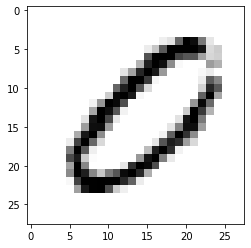

In [67]:
import matplotlib as mpl
digit = digit.reshape(28, 28)
plt.imshow(digit, cmap=mpl.cm.binary, interpolation="nearest")

### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

In [68]:
digit[20, 6]

254.0

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [69]:
X_train = X.iloc[0:60000, :]
X_test = X.iloc[60001:,:]
y_train = y.iloc[0:60000]
y_test = y.iloc[60001:]

In [70]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [71]:
# new_y_train = np.where(y_train == 5, 1, 0)
# new_y_test = np.where(y_test == 5, 1, 0)

new_y_train = y_train.apply(lambda x: 1 if x == '5' else 0)
new_y_test = y_test.apply(lambda x: 1 if x == '5' else 0)

### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [72]:
log_model = LogisticRegression() 
trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

log_model.fit(X_train_mod, new_y_train)


/Users/thaopham/.pyenv/versions/3.10.4/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [73]:
y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

### Does the classifier predict correctly the 36000th digit we picked before?

In [74]:
y_pred_train_log[35999]

1

In [75]:
y_pred_train_log[36000]

0

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [76]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [77]:
never_5_clf.fit(X_train_mod, new_y_train)
y_pred_train_n5 = never_5_clf.predict(X_train_mod)
y_pred_test_n5 = never_5_clf.predict(X_test_mod)

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

,Error_metric,Train,Test
0,Accuracy,0.975300,0.975498
1,Precision,0.907006,0.914213
2,Recall,0.809629,0.800448


/Users/thaopham/.pyenv/versions/3.10.4/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/thaopham/.pyenv/versions/3.10.4/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/thaopham/.pyenv/versions/3.10.4/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/U

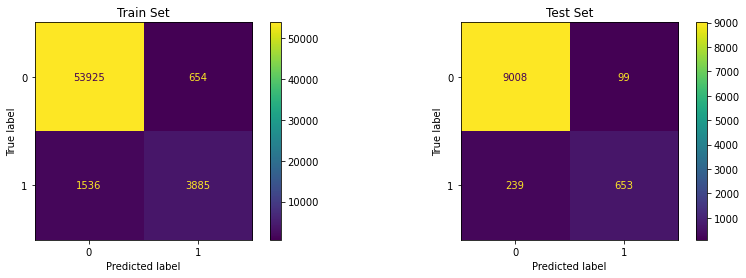

In [80]:
performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(new_y_train, y_pred_train_log),
                                         precision_score(new_y_train, y_pred_train_log),
                                         recall_score(new_y_train, y_pred_train_log)],
                               'Test': [accuracy_score(new_y_test, y_pred_test_log),
                                        precision_score(new_y_test, y_pred_test_log),
                                        recall_score(new_y_test, y_pred_test_log)]})

display(performance_log)

fig, ax = plt.subplots(1,2, figsize=(14,4))

plot_confusion_matrix(log_model,X_train,new_y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(log_model,X_test,new_y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

/Users/thaopham/.pyenv/versions/3.10.4/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/thaopham/.pyenv/versions/3.10.4/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Error_metric,Train,Test
0,Accuracy,0.90965,0.910791
1,Precision,0.00000,0.000000
2,Recall,0.00000,0.000000


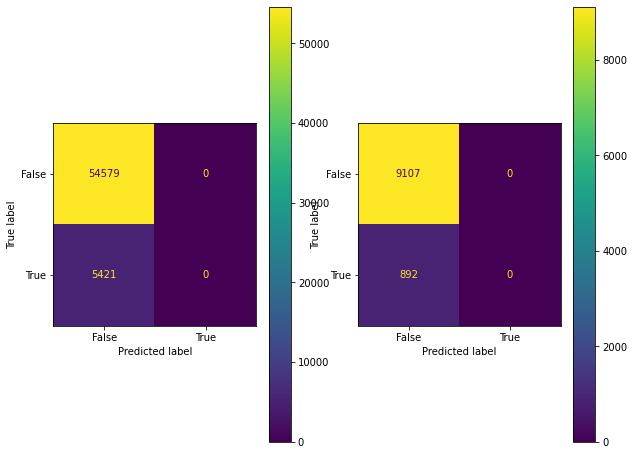

In [89]:
performance_n5 = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(new_y_train, y_pred_train_n5),
                                         precision_score(new_y_train, y_pred_train_n5),
                                         recall_score(new_y_train, y_pred_train_n5)],
                               'Test': [accuracy_score(new_y_test, y_pred_test_n5),
                                        precision_score(new_y_test, y_pred_test_n5),
                                        recall_score(new_y_test, y_pred_test_n5)]})

display(performance_n5)

# plot_confusion_matrix(never_5_clf, X_train_mod, new_y_train, values_format = 'd')
# plt.show()

from sklearn import metrics

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,8))

confusion_matrix_train = metrics.confusion_matrix(new_y_train, y_pred_train_n5)
cm_display_train = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_train, display_labels = [False, True]).plot(ax = ax1)
# ax1 = cm_display_train.plot()


confusion_matrix_test = metrics.confusion_matrix(new_y_test, y_pred_test_n5)
cm_display_test = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_test, display_labels = [False, True]).plot(ax = ax2)
# ax2 = cm_display_test.plot()



### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

In [ ]:
# the first works better as it target only 1 true positive

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

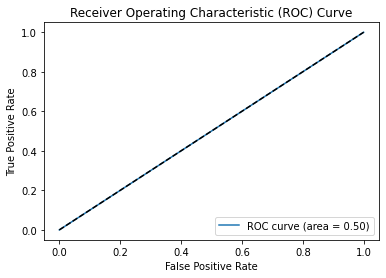

In [102]:
# Predict probabilities for the test set
# probs = log_model.predict_proba(X_test)[:,1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(new_y_test, y_pred_test_n5)

# Compute the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Now find the roc_auc_score for each. 

In [101]:
# Predict probabilities for the test set
# probs = never_5_clf.predict_proba(X_test)[:,1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(new_y_test, probs)

# Compute the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

AttributeError: 'Never5Classifier' object has no attribute 'predict_proba'

### What does this metric tell you? Which classifier works better with this metric in mind?